# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech perusahaan maju jaya jaya

- Nama: Agustinus Alvin
- Email: agustinus.alvin.wicaksono@gmail.com
- Id Dicoding: Agustinusalvin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import joblib

### Menyiapkan data yang akan digunakan

## Data Understanding

### 2.1 Informasi Dataset

In [3]:
# Baca dataset dengan pemisah titik koma
df = pd.read_csv('/content/data.csv', sep=';')
print(f"Shape: {df.shape}")

Shape: (4424, 37)


In [4]:
# Tampilkan 5 baris pertama
display(df.head())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Info kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### 2.2 Statistik Deskriptif
- **Ringkasan numerik** (mean, std, min, max, quartile)  
- **Ringkasan kategorikal** (frekuensi tiap level)

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

### Tahapan Analisis:
1. **Menghitung Statistik Deskriptif**:
    - Fungsi `df[num_cols].describe()` digunakan untuk menghitung ringkasan statistik deskriptif dari kolom numerik, seperti:
      - **Count**: Jumlah nilai non-null.
      - **Mean**: Rata-rata.
      - **Std**: Standar deviasi.
      - **Min**: Nilai minimum.
      - **25%, 50%, 75%**: Kuartil pertama, median, dan kuartil ketiga.
      - **Max**: Nilai maksimum.

2. **Tujuan**:
    - Memahami distribusi data numerik.
    - Mengidentifikasi potensi outlier (nilai ekstrem).
    - Menentukan langkah preprocessing, seperti scaling atau winsorisasi.

---

### Insight dari Output:
1. **Distribusi Data**:
    - Kolom dengan nilai rata-rata jauh dari median (50%) mungkin memiliki distribusi yang tidak normal atau outlier.
    - Kolom dengan standar deviasi tinggi menunjukkan variabilitas data yang besar.

2. **Outlier**:
    - Nilai minimum atau maksimum yang jauh dari kuartil (25% dan 75%) dapat mengindikasikan adanya outlier.

In [7]:
# Statistik deskriptif numerik
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [8]:
# Statistik deskriptif kategorikal
for col in cat_cols + ['Status']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Column: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


### 2.3 Pengecekan Missing Values

In [9]:
# Cek missing per kolom
missing = df.isna().sum()
print(missing[missing>0])

Series([], dtype: int64)


### 2.4 Distribusi Variabel Numerik
- Histogram untuk melihat sebaran
- Boxplot untuk deteksi outlier


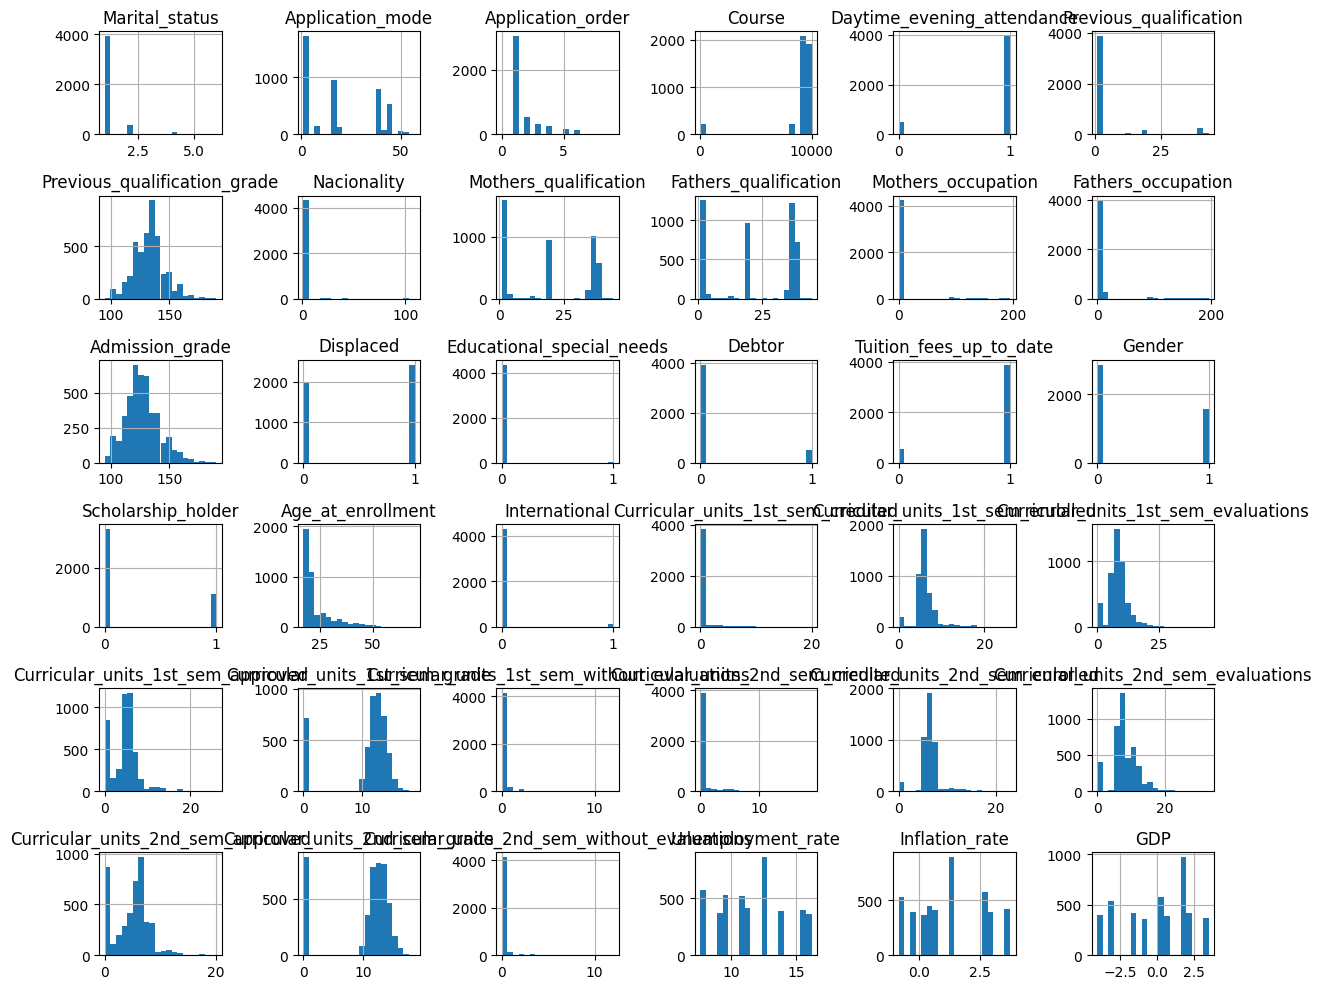

In [10]:
# Histogram semua numerik
df[num_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

### Tahapan Analisis:
1. **Visualisasi Outlier**:
    - Kode ini membuat boxplot untuk setiap kolom numerik dalam dataset `df` menggunakan fungsi `boxplot()` dari pandas.
    - Boxplot digunakan untuk mendeteksi outlier dan memahami distribusi data.

2. **Tujuan**:
    - Mengidentifikasi nilai ekstrem (outlier) di setiap kolom numerik.
    - Memahami distribusi data (simetris, skewed, atau multimodal).
    - Menentukan langkah preprocessing, seperti winsorisasi atau scaling.

---

### Insight dari Output:
1. **Outlier**:
    - Nilai yang berada di luar whisker (garis batas atas dan bawah) dianggap sebagai outlier.
    - Kolom dengan banyak outlier mungkin memerlukan penanganan khusus, seperti winsorisasi atau robust scaling.

2. **Distribusi Data**:
    - Kolom dengan median yang tidak berada di tengah box menunjukkan distribusi yang skewed.
    - Kolom dengan whisker yang panjang menunjukkan variabilitas data yang tinggi.

3. **Rekomendasi**:
    - Tangani outlier pada kolom dengan nilai ekstrem yang signifikan.
    - Gunakan robust scaler untuk kolom dengan distribusi yang tidak normal.

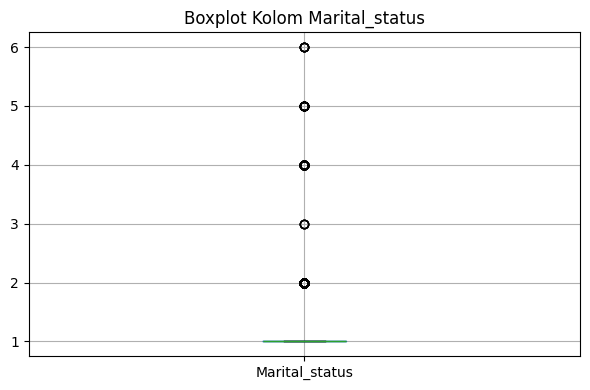

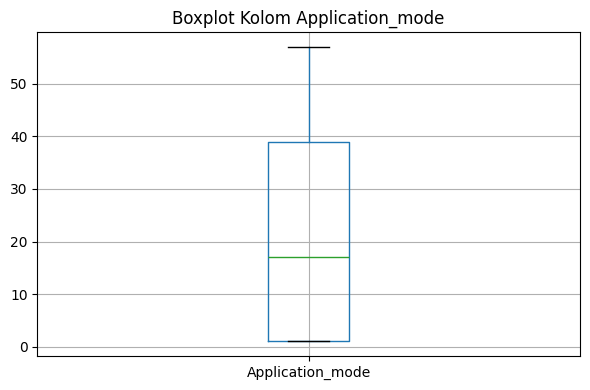

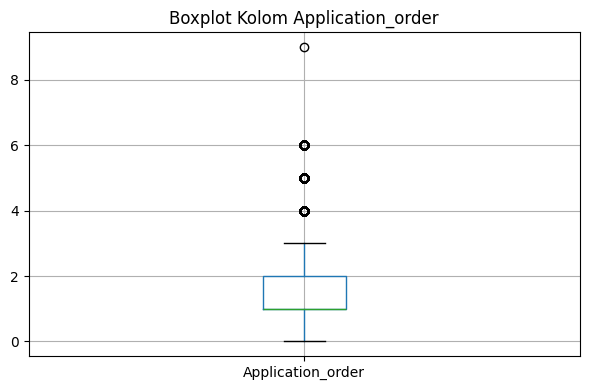

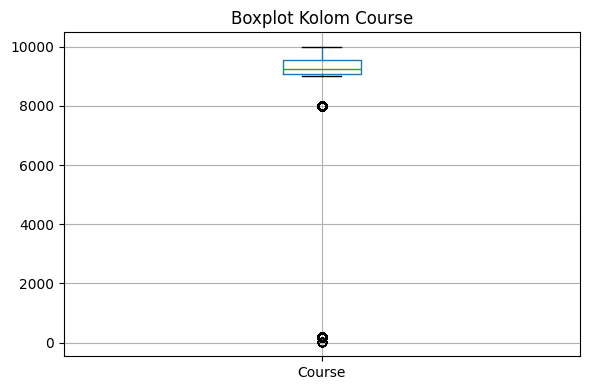

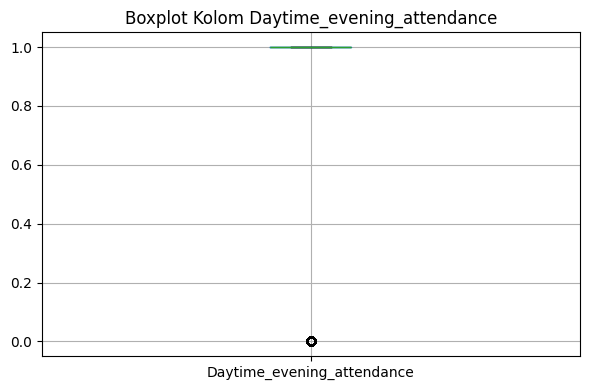

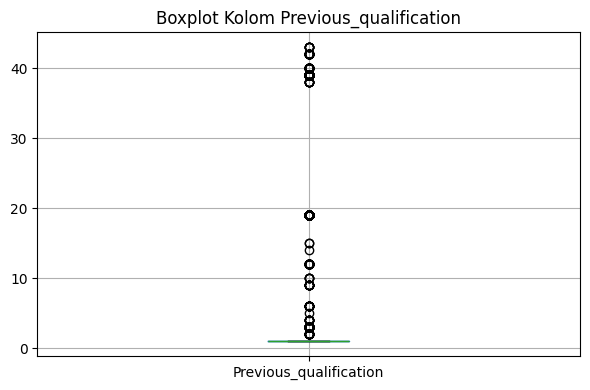

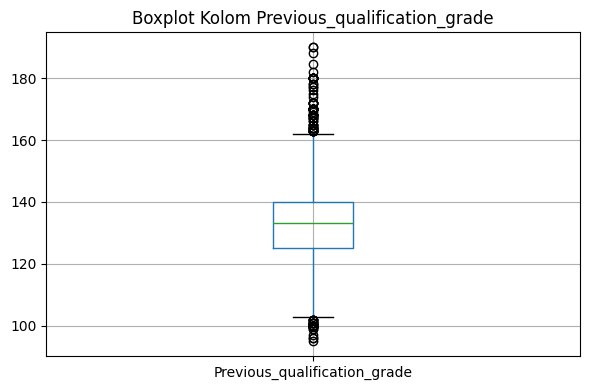

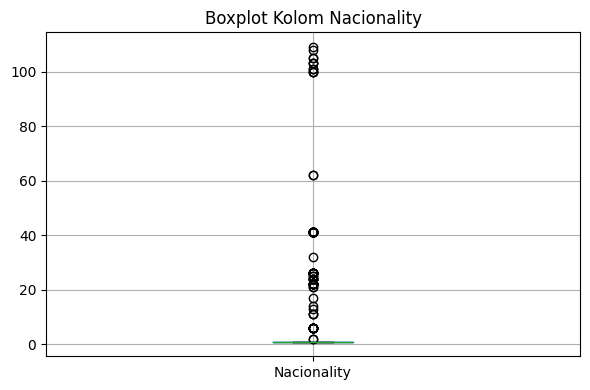

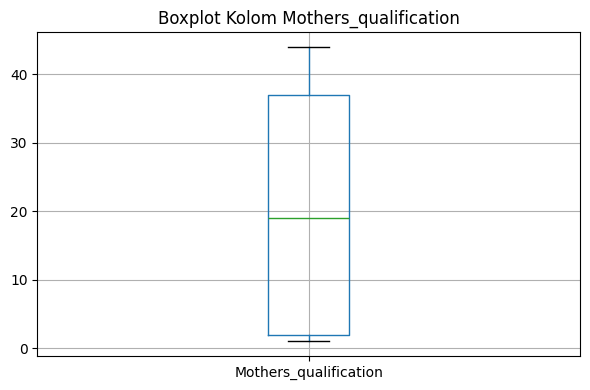

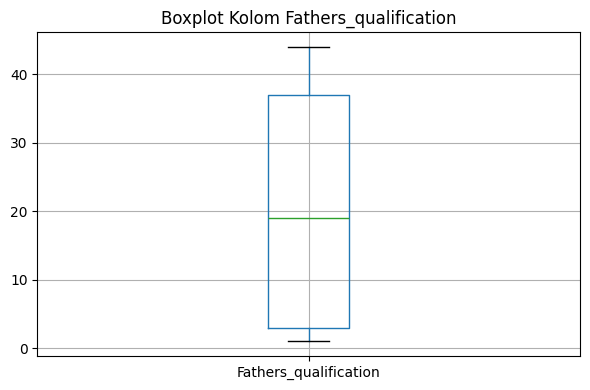

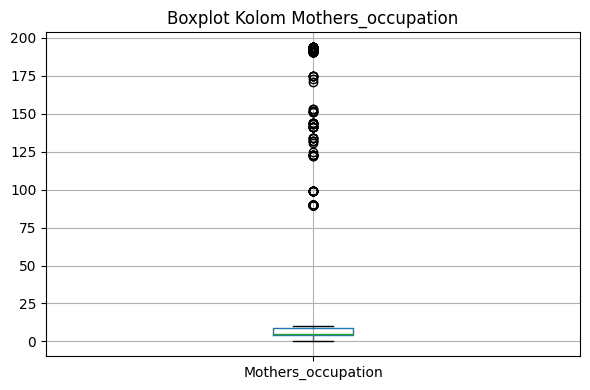

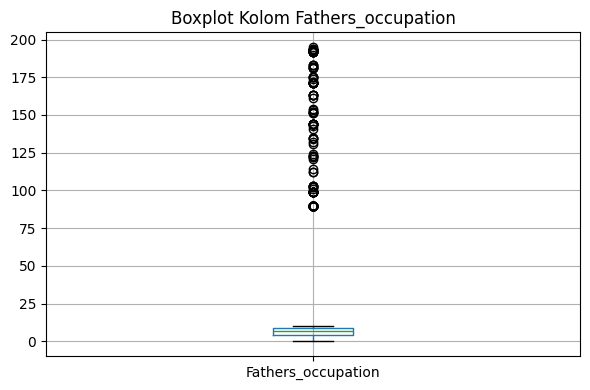

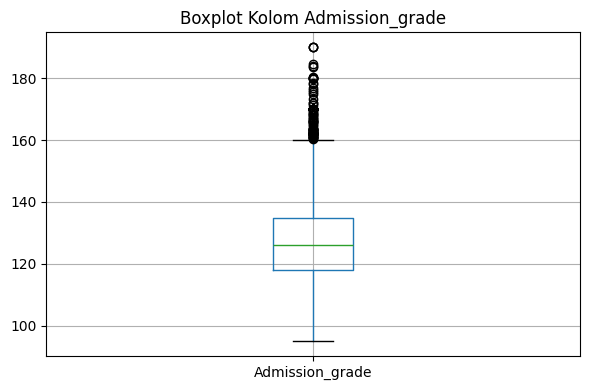

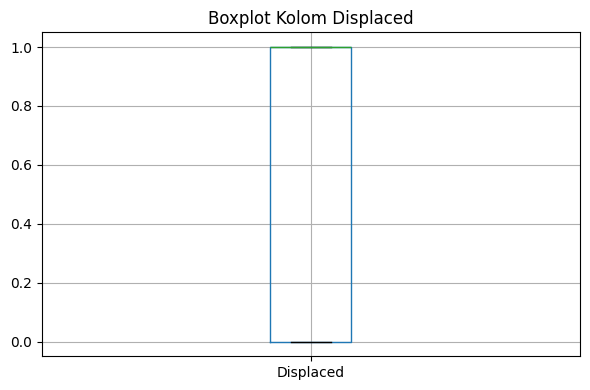

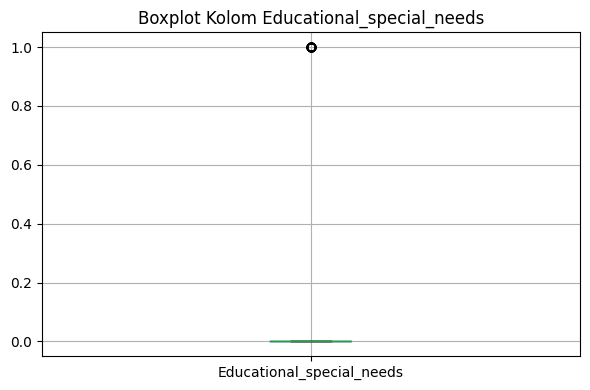

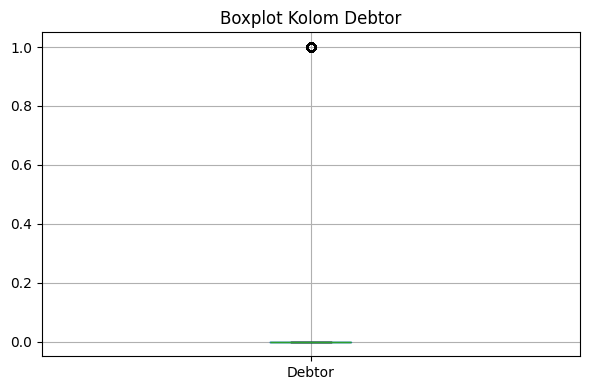

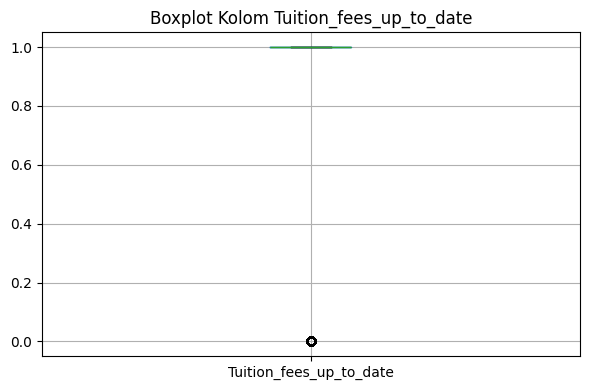

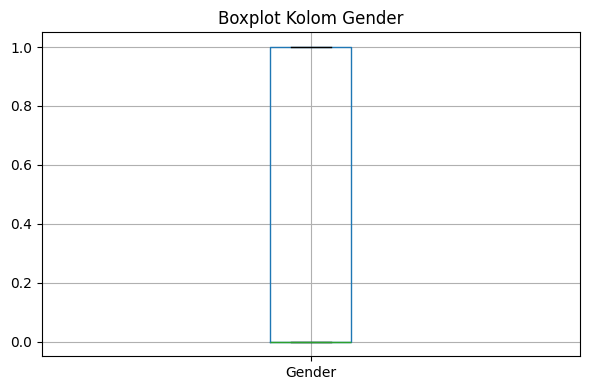

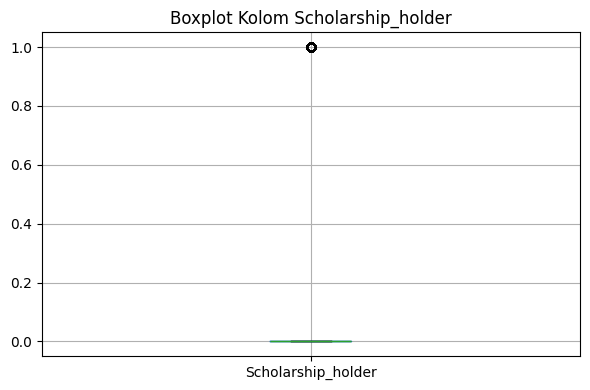

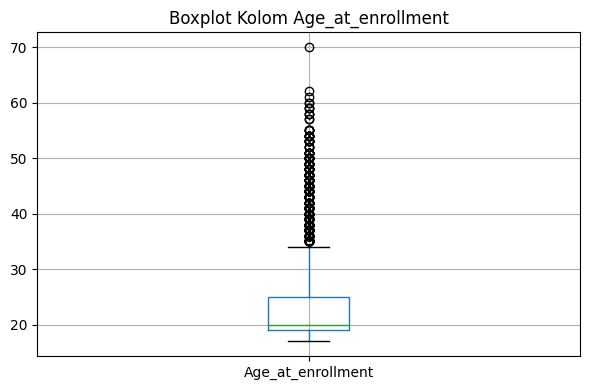

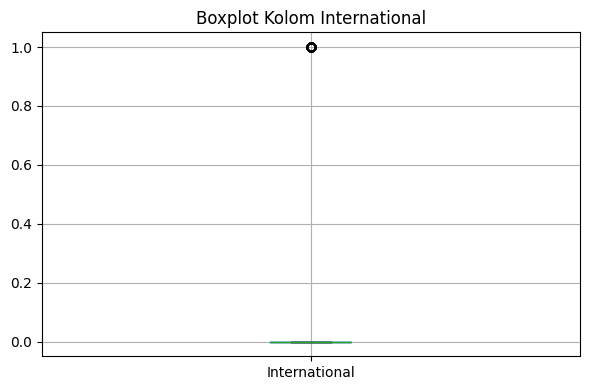

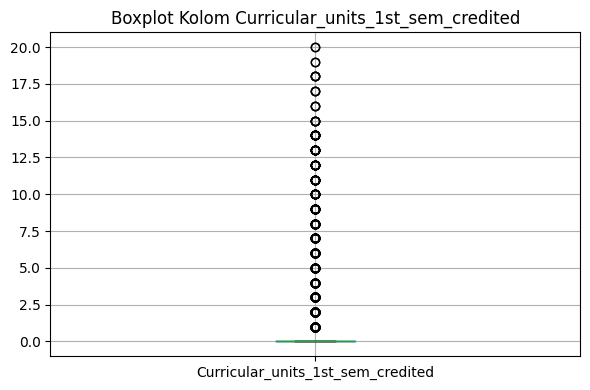

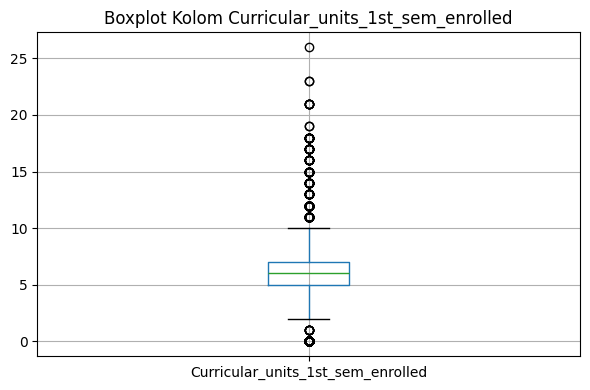

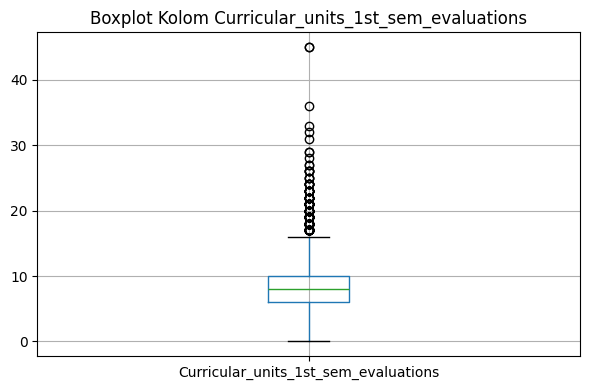

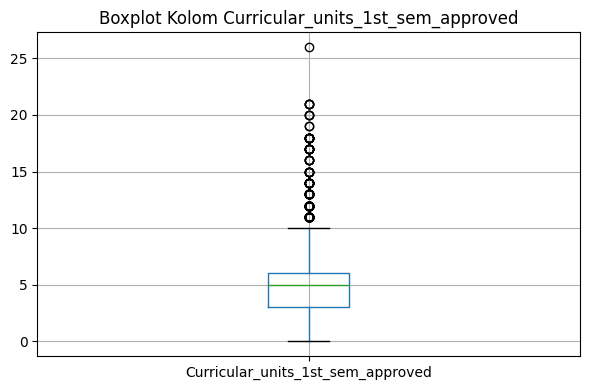

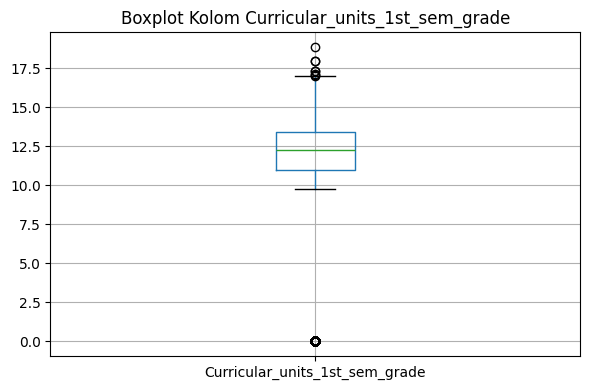

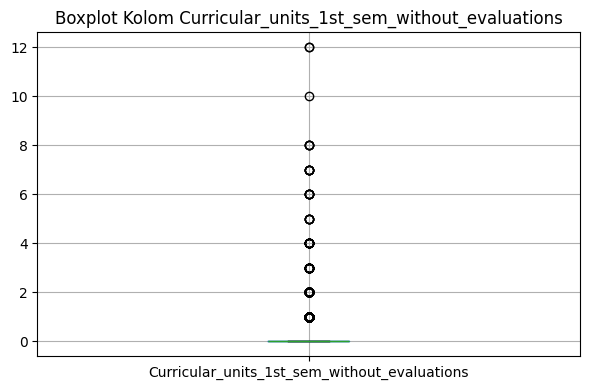

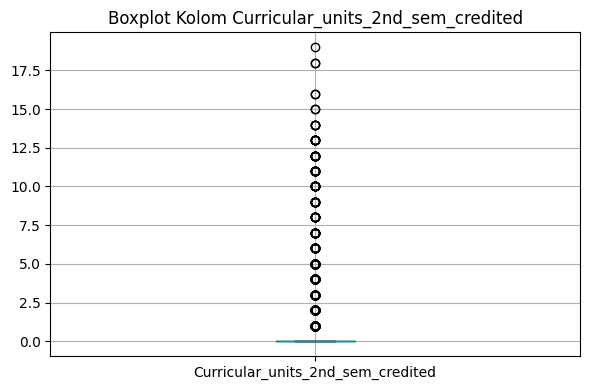

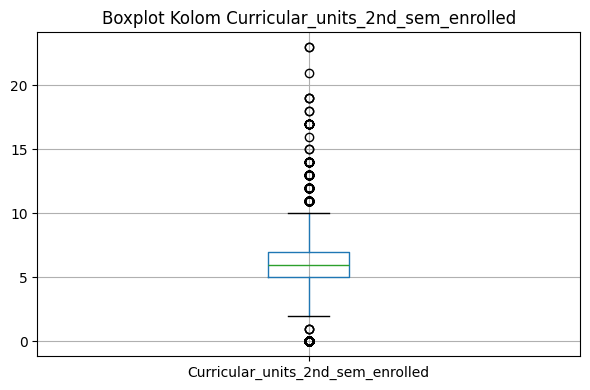

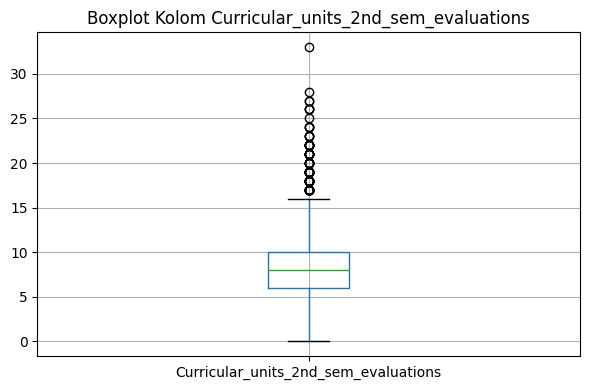

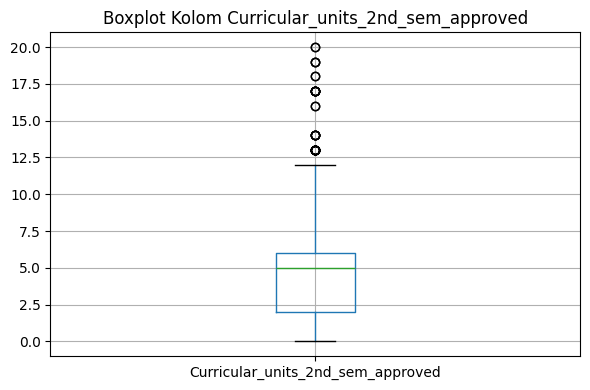

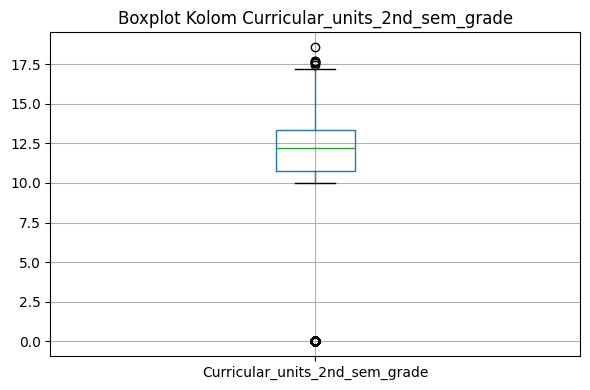

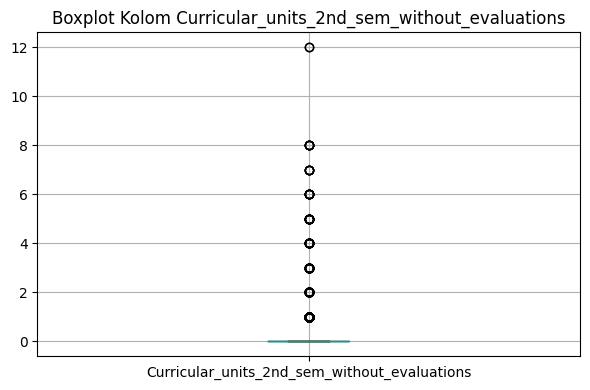

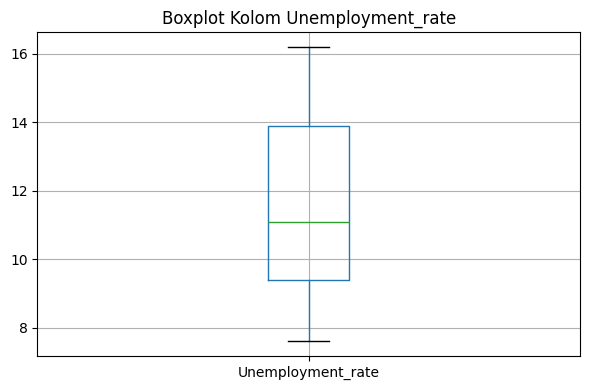

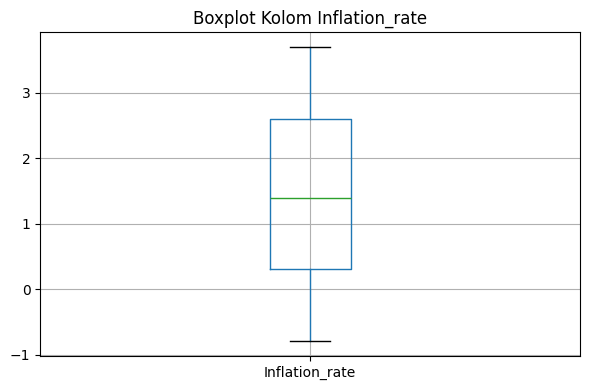

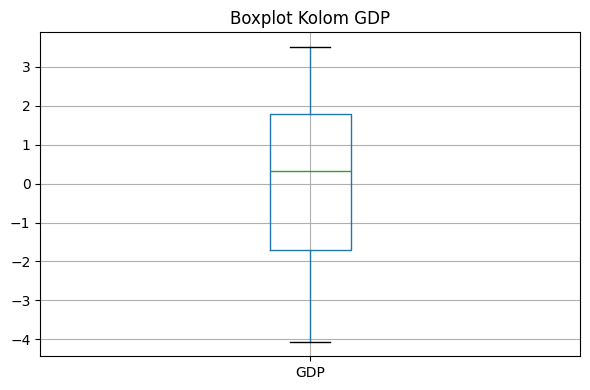

In [11]:
# Boxplot untuk setiap kolom numerik pada canvas terpisah
for col in num_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot Kolom {col}')
    plt.tight_layout()
    plt.show()

### 2.5 Distribusi Variabel Kategorikal
- Bar chart frekuensi

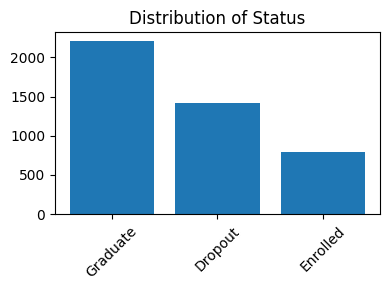

In [12]:
for col in ['Status']:
    counts = df[col].value_counts()
    plt.figure(figsize=(4,3))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 2.6 Analisis Korelasi
- Correlation matrix antar fitur numerik
- Heatmap untuk memvisualisasikan korelasi

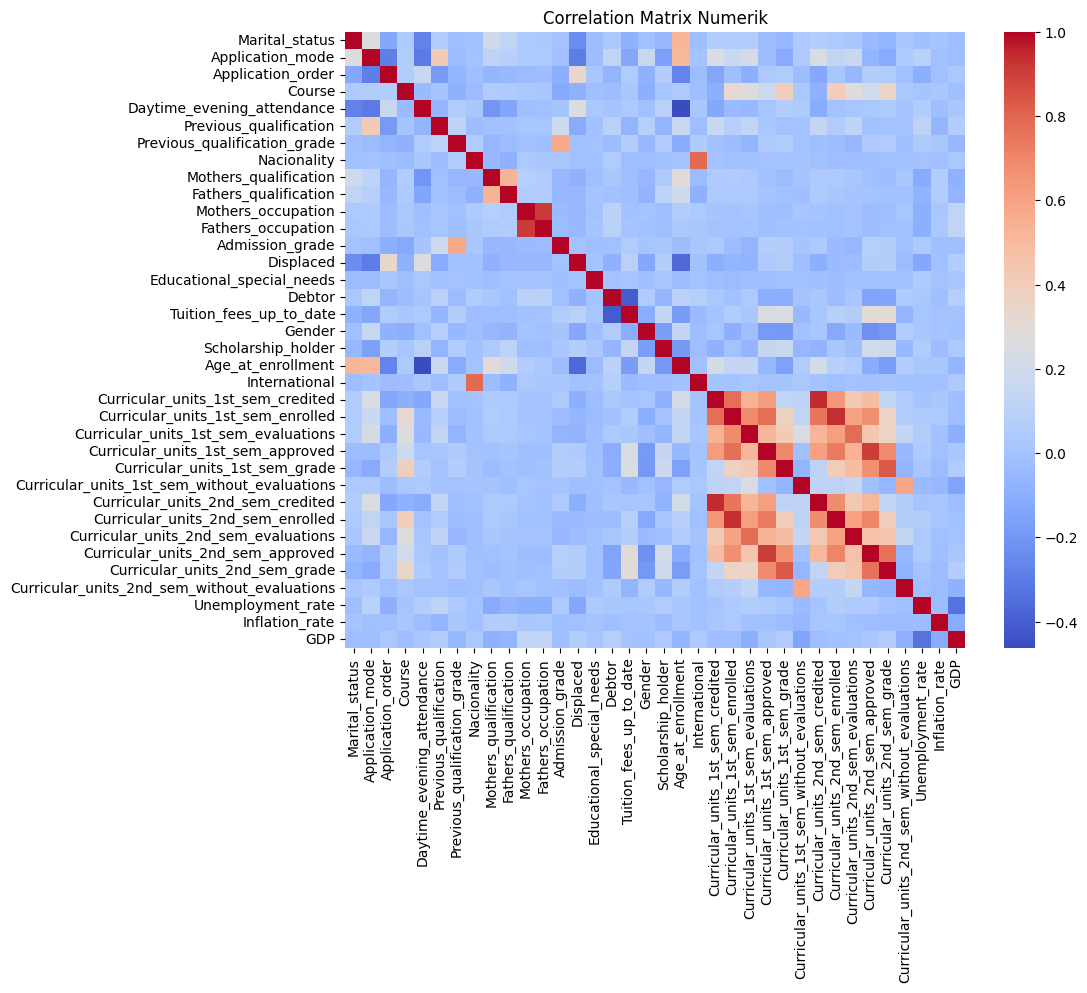

In [13]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Numerik')
plt.show()

## Data Preparation / Preprocessing
1. Cek Missing Values
2. Outlier Treatment
3. Feature Engineering
4. Encoding Variabel Kategorikal
5. Membangun Preprocessing Pipeline
6. Stratified Train/Test Split

### 3.1 Cek Missing Values

In [14]:
print(df.isnull().sum())
# → ternyata tidak ada missing, tapi kita tetap siapkan imputer di pipeline

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### 3.2 Outlier Treatment


In [15]:
#  define winsorize transformer untuk kedua fitur
def winsorize_grades(X_df):
    X = X_df.copy()
    for col in ['Admission_grade','Previous_qualification_grade']:
        X[col] = winsorize(X[col], limits=[0.01,0.01])
    return X

winsorizer = FunctionTransformer(winsorize_grades)

In [16]:
# definer robust scaler transformer untuk seluruh fitur numerik yang terdapat outliers
def robust_scaler(X_df):
    X = X_df.copy()
    for col in num_cols:
        X[col] = RobustScaler().fit_transform(X[[col]])
    return X
robust_scaler_transformer = FunctionTransformer(robust_scaler)

In [17]:
for col in ['Admission_grade','Previous_qualification_grade']:
    df[col] = winsorize(df[col], limits=[0.01,0.01])

### 3.3 Feature Engineering
Gabungkan performa semester 1 & 2 menjadi rata‑rata grade dan total units approved:

In [18]:
df['avg_sem_grade'] = (df['Curricular_units_1st_sem_grade'] + df['Curricular_units_2nd_sem_grade'])/2
df['total_units_approved'] = (df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved'])
# tambahkan ke list numerik
num_cols += ['avg_sem_grade','total_units_approved']


### 3.4 Encoding Variabel Kategorikal
- **LabelEncoder** untuk target
- **OneHotEncoder** untuk fitur kategorikal

In [19]:
le = LabelEncoder()
y_enc = le.fit_transform(df['Status'])
X = df.drop('Status', axis=1)
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

### 3.5 Membangun Preprocessing Pipeline

In [20]:
# Numeric pipeline: imputer → winsorizer → robust scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Categorical pipeline: imputer → one‑hot
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

### 3.6 Stratified Train/Test Split

Menjaga proporsi kelas (Graduate≈50%, Dropout≈32%, Enrolled≈18%).

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

## Modeling


In [22]:
# Fungsi untuk membangun & melatih model (return best estimator)
def build_model(model, param_grid=None):
    pipe = Pipeline([
        ('prep', preprocessor),
        ('clf', model)
    ])
    if param_grid:
        gs = GridSearchCV(pipe,
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1)
        gs.fit(X_train, y_train)
        print(f"→ Best params for {model.__class__.__name__}: {gs.best_params_}")
        return gs.best_estimator_
    else:
        return pipe.fit(X_train, y_train)

In [23]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 38
[LightGBM] [Info] Start training from score -1.135451
[LightGBM] [Info] Start training from score -1.717974
[LightGBM] [Info] Start training from score -0.694561


In [24]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)


In [25]:
lgbm_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__learning_rate': [0.05, 0.1]
}

lgbm_model = build_model(LGBMClassifier(random_state=42), param_grid=lgbm_param_grid)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1566
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 38
[LightGBM] [Info] Start training from score -1.135451
[LightGBM] [Info] Start training from score -1.717974
[LightGBM] [Info] Start training from score -0.694561
→ Best params for LGBMClassifier: {'clf__learning_rate': 0.05, 'clf__max_depth': 10, 'clf__n_estimators': 100}


In [26]:
catboost_param_grid = {
    'clf__iterations': [100],
    'clf__depth': [6],
    'clf__learning_rate': [0.1]
}

catboost_model = build_model(CatBoostClassifier(verbose=0, random_state=42), param_grid=catboost_param_grid)


→ Best params for CatBoostClassifier: {'clf__depth': 6, 'clf__iterations': 100, 'clf__learning_rate': 0.1}


In [27]:
# Simpan model-model terlatih untuk evaluasi selanjutnya
models = {
    'LightGBM':           lgbm_model,
    'CatBoost':           catboost_model
}

In [33]:
from sklearn.model_selection import GridSearchCV

# LightGBM pipeline dan parameter
pipe_lgbm = Pipeline([
    ('pre', preprocessor),
    ('clf', LGBMClassifier(random_state=42))
])

param_lgbm = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10],
}

gs_lgbm = GridSearchCV(pipe_lgbm, param_grid=param_lgbm, cv=3, scoring='accuracy')
gs_lgbm.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 2360, number of used features: 38
[LightGBM] [Info] Start training from score -1.135734
[LightGBM] [Info] Start training from score -1.716683
[LightGBM] [Info] Start training from score -0.694844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 2359, number of used features: 38
[LightGBM] [Info] Start training from score -1.135310
[LightGBM] [Info] Start training from score -1.718621
[LightGBM] [Info] Start training from score -0.694420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 2360, number of used features: 38
[LightGBM] [Info] Start training from score -1.135734
[LightGBM] [Info] Start training from score -1.716683
[LightGBM] [Info] Start training from score -0.694844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Marital_status',
                                                                          'Application_mode',
                                                                          'Application_order',
                                                                          'Course',
                                                                          'Daytime_evening_attendance',
                                                                          'Previous_qualification',
                                                                          'Previous_qualification_grade',
                                                                          'Nacionality',
                                                                          'Mothe...
                                                                          'Curricular_units_2nd_sem_credited',
                                                                          'Curricular_units_2nd_sem_enrolled',
                                                                          'Curricular_units_2nd_sem_evaluations', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('clf',
                                        LGBMClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [5, 10],
                         'clf__n_estimators': [100, 200]},
             scoring='accuracy')

In [34]:
pipe_cat = Pipeline([
    ('pre', preprocessor),
    ('clf', CatBoostClassifier(verbose=0, random_state=42))
])

param_cat = {
    'clf__iterations': [100, 200],
    'clf__depth': [4, 6],
}

gs_cat = GridSearchCV(pipe_cat, param_grid=param_cat, cv=3, scoring='accuracy')
gs_cat.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Marital_status',
                                                                          'Application_mode',
                                                                          'Application_order',
                                                                          'Course',
                                                                          'Daytime_evening_attendance',
                                                                          'Previous_qualification',
                                                                          'Previous_qualification_grade',
                                                                          'Nacionality',
                                                                          'Mothe...
                                                                          'Curricular_units_2nd_sem_enrolled',
                                                                          'Curricular_units_2nd_sem_evaluations', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('clf',
                                        <catboost.core.CatBoostClassifier object at 0x7a714bfd3010>)]),
             param_grid={'clf__depth': [4, 6], 'clf__iterations': [100, 200]},
             scoring='accuracy')

## Evaluation

### 5.1 Hitung metrik untuk setiap model

In [28]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # recall untuk kelas 'Dropout'
    # kita transform label 'Dropout' ke integer
    dropout_label = le.transform(['Dropout'])[0]
    rec_dropout = recall_score(y_test, y_pred, labels=[dropout_label], average=None)[0]
    results.append({
        'model': name,
        'accuracy': acc,
        'recall_dropout': rec_dropout
    })
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Dropout): {rec_dropout:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

--- LightGBM ---
Accuracy: 0.7695
Recall (Dropout): 0.7430
              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.78       284
    Enrolled       0.54      0.45      0.49       159
    Graduate       0.81      0.90      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:
 [[211  31  42]
 [ 34  72  53]
 [ 14  30 398]]

--- CatBoost ---
Accuracy: 0.7774
Recall (Dropout): 0.7711
              precision    recall  f1-score   support

     Dropout       0.80      0.77      0.78       284
    Enrolled       0.58      0.35      0.43       159
    Graduate       0.80      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885

Confusion Matrix:
 [[219  22  43]
 [ 45  55  59]
 [ 10

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 5.2 Ringkasan perbandingan

In [29]:
results_df = pd.DataFrame(results).set_index('model')
print("Summary:\n", results_df.sort_values('accuracy', ascending=False))


Summary:
           accuracy  recall_dropout
model                             
CatBoost  0.777401        0.771127
LightGBM  0.769492        0.742958


### 5.3 Pilih model terbaik berdasarkan accuracy (atau recall_dropout)

In [30]:
best_name = results_df['accuracy'].idxmax()
best_model = models[best_name]
print(f"\n>> Best model: {best_name} <<")


>> Best model: CatBoost <<


### 5.4 Export model terbaik

In [35]:
import joblib

# Simpan model LightGBM ke file
joblib.dump(gs_lgbm.best_estimator_, 'best_pipeline_lgbm.pkl')

# Simpan model CatBoost ke file
joblib.dump(gs_cat.best_estimator_, 'best_pipeline_cat.pkl')


['best_pipeline_cat.pkl']

In [37]:
# === 1. Salin DataFrame asli untuk membuat salinan prediksi ===
scored_df = df.copy()

# === 2. Tambahkan kolom prediksi dan probabilitas keluar dari model ===
scored_df['Predicted_Status'] = best_model.predict(X)
scored_df['Leave_Probability'] = best_model.predict_proba(X)[:, 1]

# === 3. Simpan ke file CSV ===
scored_df.to_csv('student_scored.csv', index=False)

# === 4. Informasi konfirmasi ===
print("✅ File 'student_scored.csv' berhasil disimpan dan siap diunggah ke Google Sheets untuk Looker Studio.")


✅ File 'student_scored.csv' berhasil disimpan dan siap diunggah ke Google Sheets untuk Looker Studio.
